In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/car_age_price.csv')

## ***Understanding the dataset***

In [6]:
data.shape

(112, 2)

In [7]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [9]:
# checking for missing values

data.isna().sum()

Year     0
Price    0
dtype: int64

In [10]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


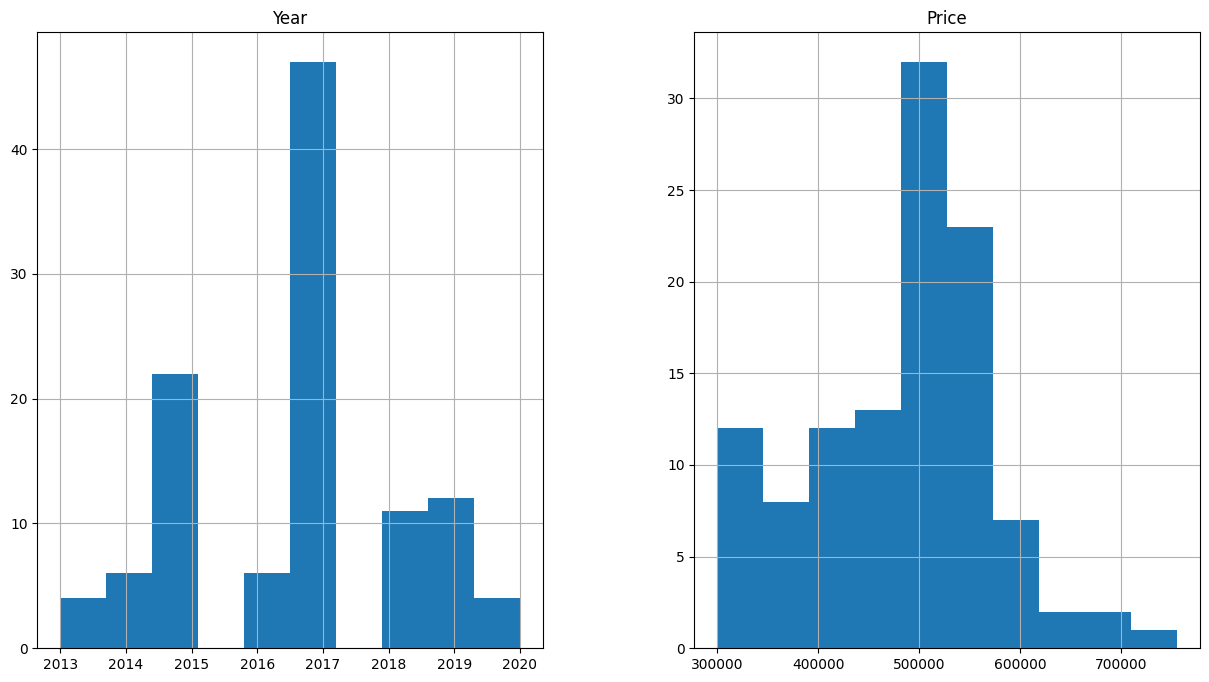

In [11]:
freqgraph = data.select_dtypes(include='int64')
freqgraph.hist(figsize=(15,8))
plt.show()

## ***Checking for outliers***

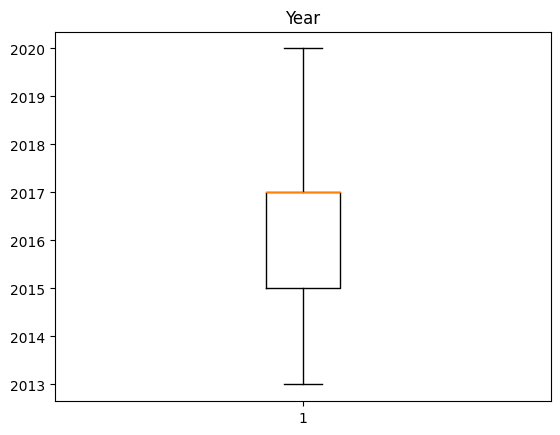

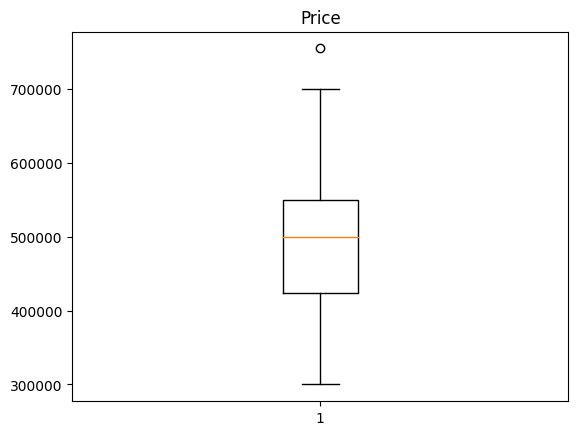

In [12]:
num_col = ['Year','Price']
for i in num_col:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()


In [13]:
# handling outlier using IQR method

Q1 = data['Price'].quantile(0.25)
Q2 = data['Price'].quantile(0.50)
Q3 = data['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

In [14]:
# clipping
data['Price'] = data['Price'].clip(lower=lower_lim, upper=upper_lim)
outliers = data[(data['Price'] < lower_lim) | (data['Price'] > upper_lim)]

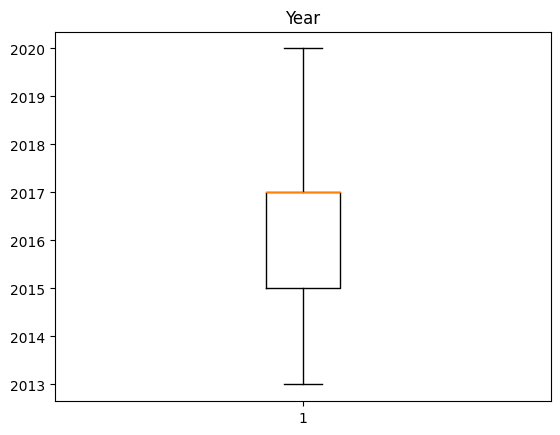

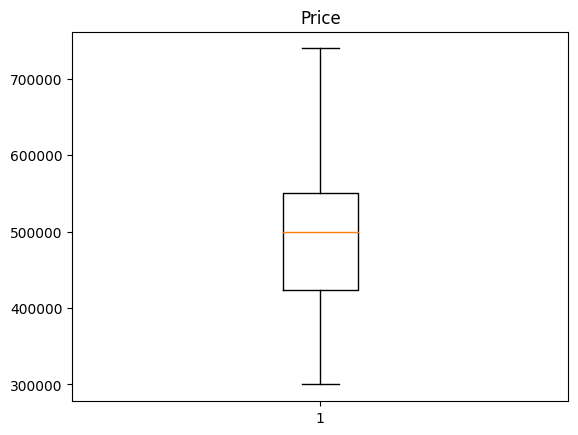

In [15]:
for i in num_col:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

## ***Checking for correlation***

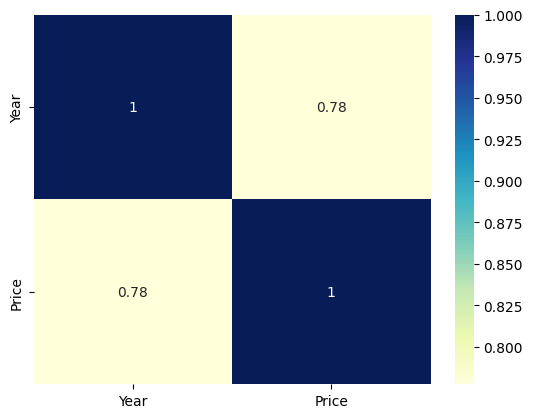

In [16]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

## ***Regression***

In [17]:
y = data['Price']
X = data.drop(['Price'],axis=1)

In [18]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.25)

In [19]:
# Linear Regression

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
lr_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
print('MSE is : ',mean_squared_error(y_test,lr_pred))

MSE is :  3856123887.8510513


In [21]:
# Lasso Regression

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso_model = lasso.fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
print('MSE is : ',mean_squared_error(y_test,lasso_pred))

MSE is :  3856120811.044556


In [23]:
from sklearn.metrics import r2_score

r2_linear = r2_score(y_test,lr_pred)
r2_lasso = r2_score(y_test,lasso_pred)

print('R-squared (Linear Regression):', r2_linear)
print('R-squared (Lasso Regression): ', r2_lasso)

R-squared (Linear Regression): 0.4380956804935515
R-squared (Lasso Regression):  0.4380961288377724


In [24]:
# Predicting the possible price of a 2022 model second-hand grand i10

X_new=[[2022]]

# predictions using the linear regression model
predicted_price_linear = model.predict(X_new)

# predictions using the lasso regression model
predicted_price_lasso = lasso_model.predict(X_new)

print("Predicted Price for a 2022 model using Linear Regression:",predicted_price_linear[0])
print("Predicted Price for a 2022 model using Lasso Regression:",predicted_price_lasso[0])

Predicted Price for a 2022 model using Linear Regression: 739002.0571428686
Predicted Price for a 2022 model using Lasso Regression: 739001.8409052342


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


**After comparing the models, it appears that the lasso regression model performs better than the linear regression model in predicting the price of second-hand Hyundai Grand i10 cars. The R2 value for the lasso regression model is which is slightly higher than the R2 value for the linear regression model. This suggests that the lasso model is a more effective predictor.**